In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

### Secion 2 Crouseilles Lawson for Dahlquist eq.

$$u_t = \lambda_1u + \lambda_2u \equiv Au + F(u)$$
$$|\lambda_1| >> |\lambda_2|$$

$$v_t = e^{-tA}F(e^{tA}v(t)) \equiv \lambda_2 v(t) = f(v)$$

In [2]:
l1, l2 = -10, -0.03
t0 = 0.0
u0 = [1.0]
steps = 100

tu = np.empty((steps))
tv = np.empty((steps))
u = np.empty((steps))
uv = np.empty((steps))

# var change
v0 = u0 # * np.exp(-t0*l1) === 1.0
# rhs for v
def fv(t, v):
    return l2 * v

# v integrator
v_integ = scipy.integrate.RK45(fv, t0, v0, 100., max_step=0.1)

# rhs for u
def fu(t, u):
    return (l1 + l2) * u

u_integ = scipy.integrate.RK45(fu, t0, u0, 100., max_step=0.1)

max error Lawson-RK 2.7755575615628914e-17
max error RK 0.00016871062123058334


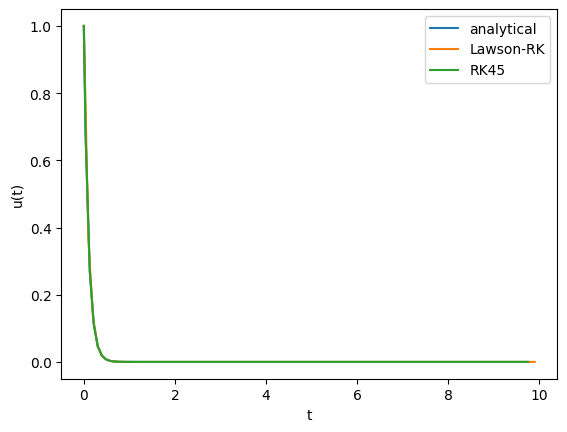

In [3]:
for i in range(steps):
    tv[i] = v_integ.t
    uv[i] = v_integ.y * np.exp(v_integ.t*l1)
    v_integ.step()
    tu[i] = u_integ.t
    u[i] = u_integ.y
    u_integ.step()
    
print("max error Lawson-RK", np.max(np.abs(uv - np.exp((l1 + l2)*tv))))
print("max error RK", np.max(np.abs(u - np.exp((l1 + l2)*tu))))
plt.plot(tu, np.exp((l1 + l2)*tu), label="analytical")
plt.plot(tv, uv, label="Lawson-RK")
plt.plot(tu, u, label="RK45")
plt.legend()
plt.xlabel("t")
plt.ylabel("u(t)")
plt.show()